In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import pathlib
import os
import tensorflow as tf
import numpy as np
import IPython.display as display
import matplotlib.pyplot as plt
from PIL import Image

In [19]:
# https://www.tensorflow.org/tutorials/load_data/images

# data
data_dir = pathlib.Path("../data/raw")

# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [20]:
image_files = list(data_dir.glob("Tomato*/*.JPG"))
image_count = len(image_files)

In [21]:
BATCH_SIZE = 32
IMG_HEIGHT = 256
IMG_WIDTH = 256
STEPS_PER_EPOCH = np.ceil(image_count / BATCH_SIZE)

In [39]:
def get_class_name(item):
    return item.name.split("___")[1]

In [77]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob("Tomato*")])

In [78]:
CLASS_NAMES

array(['Tomato___Early_blight', 'Tomato___healthy',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Leaf_Mold',
       'Tomato___Spider_mites Two-spotted_spider_mite',
       'Tomato___Tomato_mosaic_virus', 'Tomato___Target_Spot',
       'Tomato___Septoria_leaf_spot', 'Tomato___Late_blight',
       'Tomato___Bacterial_spot'], dtype='<U45')

Early_blight


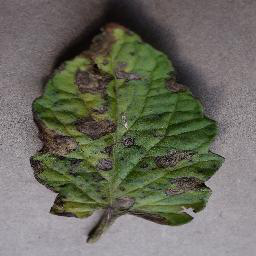

Early_blight


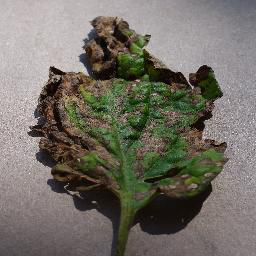

Early_blight


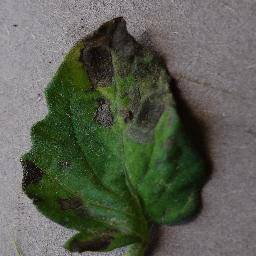

In [79]:
for image_path in image_files[:3]:
    print(get_class_name(image_path.parent))
    display.display(Image.open(str(image_path)))

In [80]:
image_path = image_files[0]

In [81]:
image_path.parent.name

'Tomato___Early_blight'

In [82]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))


Found 18160 images belonging to 10 classes.


In [83]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'Tomato*/*'))

In [84]:
for f in list_ds.take(5):
    print(f.numpy())

b'../data/raw/Tomato___Septoria_leaf_spot/2b66d465-d98a-405a-9775-3b03ac58e7e5___Matt.S_CG 0757.JPG'
b'../data/raw/Tomato___Bacterial_spot/4611cf04-efee-4c3b-83e7-e1d8325663ae___GCREC_Bact.Sp 5845.JPG'
b'../data/raw/Tomato___healthy/1d31b822-7933-4801-a18c-657b8af377d6___RS_HL 0636.JPG'
b'../data/raw/Tomato___Bacterial_spot/b16f9d46-69a2-4774-ab87-50159dc34dcc___GCREC_Bact.Sp 3471.JPG'
b'../data/raw/Tomato___Tomato_Yellow_Leaf_Curl_Virus/b7de3219-7adb-4110-80c0-144926c491cd___YLCV_GCREC 2655.JPG'


In [85]:
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    return parts[-2] == CLASS_NAMES

def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=3)
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    # resize the image to the desired size.
    return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(file_path):
    label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

In [86]:
file_paths = [f for f in list_ds.take(5)]

In [87]:
file_path = file_paths[0]

In [88]:
get_label(file_path)

<tf.Tensor: id=496, shape=(10,), dtype=bool, numpy=
array([False, False, False, False, False,  True, False, False, False,
       False])>

In [89]:
parts = tf.strings.split(file_path, os.path.sep)

In [90]:
parts[-2]

<tf.Tensor: id=558, shape=(), dtype=string, numpy=b'Tomato___Tomato_mosaic_virus'>

In [91]:
CLASS_NAMES

array(['Tomato___Early_blight', 'Tomato___healthy',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Leaf_Mold',
       'Tomato___Spider_mites Two-spotted_spider_mite',
       'Tomato___Tomato_mosaic_virus', 'Tomato___Target_Spot',
       'Tomato___Septoria_leaf_spot', 'Tomato___Late_blight',
       'Tomato___Bacterial_spot'], dtype='<U45')

In [92]:
file_path

<tf.Tensor: id=428, shape=(), dtype=string, numpy=b'../data/raw/Tomato___Tomato_mosaic_virus/c56876f0-d18b-4a90-86d1-7f90e8e15fac___PSU_CG 2240.JPG'>